# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку perimeter или area, равную width * height. Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [173]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data/SpotifyFeatures.csv')
df.head(4)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.0,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227


In [174]:
# Основная информация об устройстве датафрейма:
# Названия колонок количество записей, типы колонок, количество пропусков в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [175]:
# Простые статистики данных
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# Графики

Линейный график

In [176]:
df.popularity

0          0
1          1
2          3
3          0
4          4
          ..
232720    39
232721    38
232722    47
232723    44
232724    35
Name: popularity, Length: 232725, dtype: int64

In [177]:
df.popularity.value_counts()

0      6312
50     5415
53     5414
51     5401
52     5342
       ... 
96        8
94        7
99        4
98        3
100       2
Name: popularity, Length: 101, dtype: int64

In [178]:
df.popularity.value_counts().sort_index()

0      6312
1      1289
2       903
3       817
4       811
       ... 
96        8
97       10
98        3
99        4
100       2
Name: popularity, Length: 101, dtype: int64

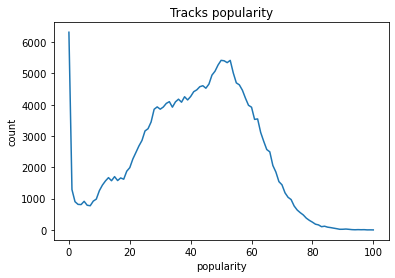

In [179]:
popularity_cnt = df.popularity.value_counts().sort_index()
plt.plot(popularity_cnt.index, popularity_cnt.values)

plt.title('Tracks popularity')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

Гистограммы

In [180]:
df['mode']

0         Major
1         Minor
2         Minor
3         Major
4         Major
          ...  
232720    Major
232721    Minor
232722    Major
232723    Major
232724    Minor
Name: mode, Length: 232725, dtype: object

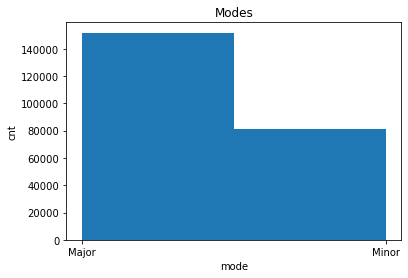

In [181]:
plt.hist(df['mode'], bins=2)
plt.title('Modes')
plt.xlabel('mode')
plt.ylabel('cnt')
plt.show()

In [182]:
df.time_signature.value_counts()

4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: time_signature, dtype: int64

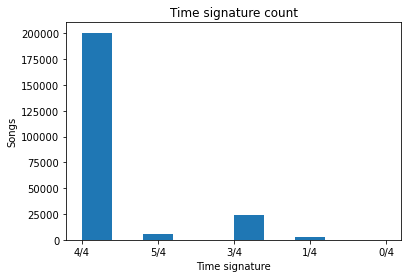

In [183]:
plt.hist(df.time_signature)
plt.title('Time signature count')
plt.xlabel('Time signature')
plt.ylabel('Songs')
plt.show()

2d гистограммы

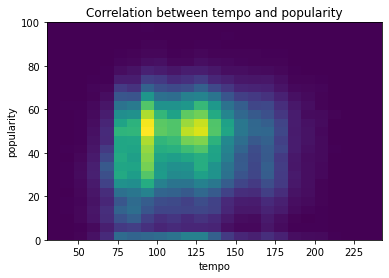

In [184]:
plt.hist2d(df.tempo, df.popularity, bins=25)
plt.title('Correlation between tempo and popularity')
plt.xlabel('tempo')
plt.ylabel('popularity')
plt.show()

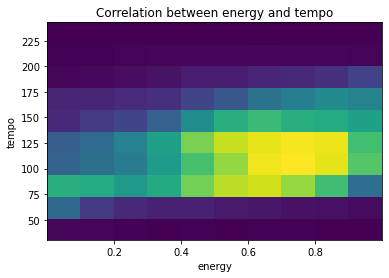

In [185]:
plt.hist2d(df.energy, df.tempo)
plt.title('Correlation between energy and tempo')
plt.xlabel('energy')
plt.ylabel('tempo')
plt.show()

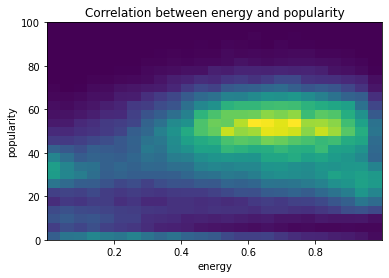

In [186]:
plt.hist2d(df.energy, df.popularity, bins=25)
plt.title('Correlation between energy and popularity')
plt.xlabel('energy')
plt.ylabel('popularity')
plt.show()

Рассеяния

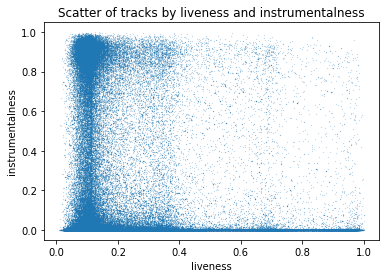

In [187]:
plt.scatter(df.liveness	, df.instrumentalness, s=0.01)
plt.title('Scatter of tracks by liveness and instrumentalness')
plt.xlabel('liveness')
plt.ylabel('instrumentalness')
plt.show()

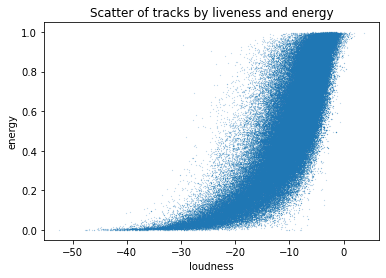

In [188]:
plt.scatter(df.loudness	, df.energy, s=0.01)
plt.title('Scatter of tracks by liveness and energy')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.show()

Boxplots

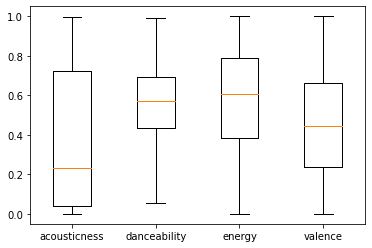

In [189]:
track_features = [ 
    'acousticness',
    'danceability', 
    'energy',
    'valence'
]
plt.boxplot(df[track_features], labels=track_features)
plt.show()


NEW

In [190]:
new_df = df
new_df.loc[:, 'pop_club_music'] = new_df['danceability'] + new_df['energy'] - new_df['loudness'] / 100 + new_df['popularity'] / 400
max_dfClub = max(new_df['pop_club_music'])
new_df['club'] = new_df['pop_club_music'].apply(lambda x: x / max_dfClub)
#new_df
df.pop_club_music.describe()

count    232725.000000
mean          1.323840
std           0.337852
min           0.325490
25%           1.134770
50%           1.407450
75%           1.573690
max           2.088210
Name: pop_club_music, dtype: float64

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [191]:
import numpy as np
import scipy as sc
import scipy.interpolate

# Генерация точек

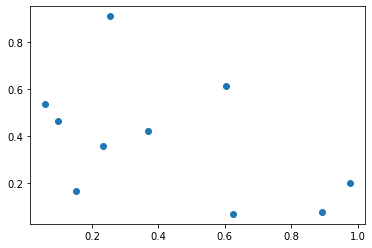

In [192]:
x = np.random.uniform(size=10)
y = np.random.uniform(size=10)
plt.scatter(x, y)
plt.show()

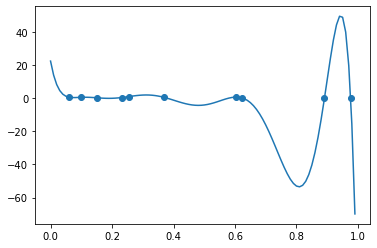

In [198]:
from scipy.interpolate import KroghInterpolator

interpolator = KroghInterpolator(x, y)
x1 = np.array(list(range(0, 100)))
x1 = x1 / 100
interpolatedY = [interpolator(xi) for xi in x1]
plt.scatter(x, y)
plt.plot(x1, interpolatedY)
plt.show()


[KroghInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.KroghInterpolator.html#scipy.interpolate.KroghInterpolator)

[class KroghInterpolator(_Interpolator1DWithDerivatives):](https://github.com/scipy/scipy/blob/v1.7.1/scipy/interpolate/polyint.py#L220-L355)

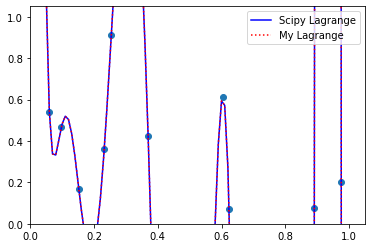

In [209]:
def lagrange(x, y):
    n = len(x)
    def fp(xq):
        yq = 0.0
        for i in range(n):
            ln = 1.0
            ld = 1.0
            for j in range(n):
                if j != i:
                    ln *= xq - x[j]
                    ld *= x[i] - x[j]
            yq += y[i] * ln / ld
        return yq
    return fp

plt.plot(x, y, 'o')
x1 = np.array(list(range(0, 100)))
x1 = x1 / 100
y1 = lagrange(x, y)(x1)
plt.plot(x1, y1, label="Scipy Lagrange", color="blue")
y1 = sc.interpolate.lagrange(x, y)(x1)
plt.plot(x1, y1, label="My Lagrange", ls=":", color="red")
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.legend()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange
https://github.com/scipy/scipy/blob/v1.9.3/scipy/interpolate/_interpolate.py#L25-L91

[Wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%87%D0%BB%D0%B5%D0%BD_%D0%9B%D0%B0%D0%B3%D1%80%D0%B0%D0%BD%D0%B6%D0%B0)

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


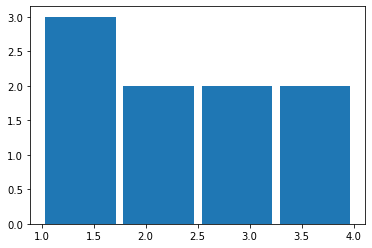

In [199]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [200]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    maximim = max(array)
    minimum = min(array)
    step = (maximim - minimum) / bins
    count = [0] * bins
    for i in array:
      count[min(int((i - minimum) / step) , bins - 1)] += 1
    return (count, np.arange(minimum, maximim, step))
    raise NotImplemented

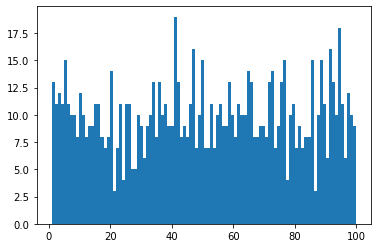

In [201]:
import random
ar = [random.randint(1, 100) for _ in range(1000)]
value_counts, bins_names, visual_figure = plt.hist(ar, 100)

<BarContainer object of 100 artists>

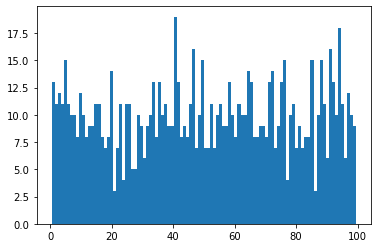

In [202]:
counts, names = fast_hist(ar, 100)
plt.bar(names, counts, width=1.0)

56.1 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
449 µs ± 71.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


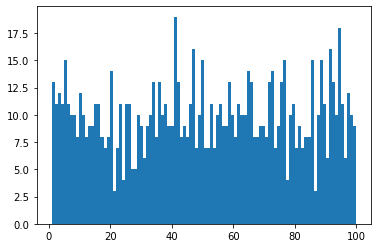

In [203]:
%timeit plt.hist(ar, 100)
%timeit fast_hist(ar, 100)

50 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


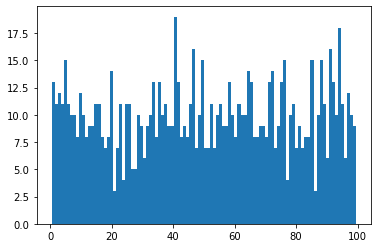

In [204]:
%%timeit
counts, names = fast_hist(ar, 100)
plt.bar(names, counts, width=1.0)